In [27]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [86]:
def teylor_method(f, grid, y0, partials):
    result = []
    for i, x in enumerate(grid):
        if i == 0:
            # result += [y0]
            result.append(y0)
        else:
            h = grid[i] - grid[i-1]
            x, y = grid[i-1], result[-1]
            new_y = result[-1] + h*(f(x, y) + 0.5*h*(partials['x'](x, y) + partials['y'](x, y)*f(x, y)))
            result.append(new_y)
    return np.array(result)

In [96]:
def get_optimal_grid(f, a, b, y0, partials, n_init=10, eps=0.01):
    delta = np.inf
    h = (b - a)/n_init
    while delta > eps:
        y_old = teylor_method(f, np.arange(a, b, h), y0, partials)
        y_new = teylor_method(f, np.arange(a, b, h/2), y0, partials)
        delta = max(np.abs(y_new[0::2] - y_old))
        h /= 2
    return np.arange(a, b, h)

In [97]:
f = lambda x, y: -x*y + np.sin(x)
a, b = 1, 10
y0 = 0.5

partials = {
    'x': lambda x, y: -y + np.cos(x),
    'y': lambda x, y: -x
}

$$ y^{'} = -xy + \sin(x)$$

In [98]:
grid = get_optimal_grid(f, a, b, y0, partials)

In [99]:
grid

array([1.    , 1.1125, 1.225 , 1.3375, 1.45  , 1.5625, 1.675 , 1.7875,
       1.9   , 2.0125, 2.125 , 2.2375, 2.35  , 2.4625, 2.575 , 2.6875,
       2.8   , 2.9125, 3.025 , 3.1375, 3.25  , 3.3625, 3.475 , 3.5875,
       3.7   , 3.8125, 3.925 , 4.0375, 4.15  , 4.2625, 4.375 , 4.4875,
       4.6   , 4.7125, 4.825 , 4.9375, 5.05  , 5.1625, 5.275 , 5.3875,
       5.5   , 5.6125, 5.725 , 5.8375, 5.95  , 6.0625, 6.175 , 6.2875,
       6.4   , 6.5125, 6.625 , 6.7375, 6.85  , 6.9625, 7.075 , 7.1875,
       7.3   , 7.4125, 7.525 , 7.6375, 7.75  , 7.8625, 7.975 , 8.0875,
       8.2   , 8.3125, 8.425 , 8.5375, 8.65  , 8.7625, 8.875 , 8.9875,
       9.1   , 9.2125, 9.325 , 9.4375, 9.55  , 9.6625, 9.775 , 9.8875])

In [100]:
y1 = teylor_method(f, grid, y0, partials)
y2 = teylor_method(f, grid[0::2], y0, partials)

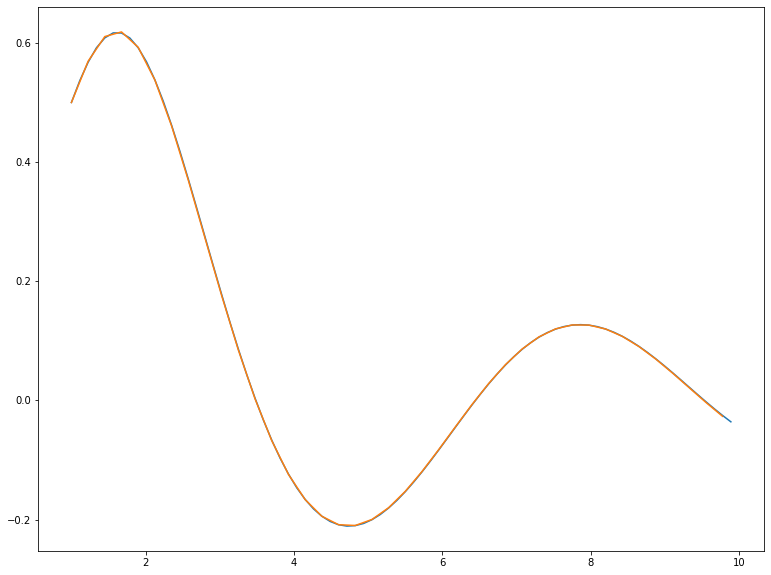

In [101]:
plt.figure(figsize=(13, 10))
plt.plot(grid, y1)
plt.plot(grid[0::2], y2)

In [42]:
a = [1, 5, 2, 3]
a[0::2]

[1, 2]